<a href="https://colab.research.google.com/github/waraporn19/Project_2021_matchingcolor/blob/main/double_set1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [6]:
path = '/content/drive/My Drive/shadeimg'

In [7]:
os.listdir(path)

['รูปฟัน07',
 '9-10 7 2021',
 '11 7 2021',
 'ฟันสักอย่างจำวันไม่ได้',
 '1 teeth .gsheet',
 '16 8 2021',
 '17 8 2021',
 '2 teeth.gsheet',
 '1 teeth .xlsx',
 '2 teeth .xlsx',
 'A1.gsheet']

In [17]:
file_path = os.path.join(path,'A1.gsheet')
print(file_path)

/content/drive/My Drive/shadeimg/A1.gsheet


In [ ]:
table1 = pd.read_excel(file_path)

In [ ]:
table1

In [20]:
!pip install azure-storage-blob==2.1.0

     |████████████████████████████████| 88 kB 6.0 MB/s 
     |████████████████████████████████| 47 kB 4.4 MB/s 
     |████████████████████████████████| 3.5 MB 21.0 MB/s 


In [21]:
from azure.storage.blob import BlockBlobService
import os

In [22]:
 blob_service_client = BlockBlobService(account_name='dent01', account_key='CuShY0B4TZJ84TjzPpaHxyrHOpO73aGXeCpdVq7x26OjIlQ1HOz+3DVc9pDEj9BdcEL8odFuTRF0mOAE+aCgiw==')

#1.สร้างตัวแปรเฉดไกด์

Set1

In [23]:
doubleA1A2_1 = '3E2D92F5-C039-4375-8801-7177CE0C110B.png'


#2. ดึงรูป

A1A2

In [24]:
full_path_to_file2 = os.path.join(doubleA1A2_1) 
blob_service_client.get_blob_to_path('shadeimg', full_path_to_file2, full_path_to_file2)

#3. BGR to RGB

In [25]:
import cv2
from matplotlib import pyplot as plt #การเรียกใช้คำสั่ง matplotlib เพื่อวาดกราฟ โดยแทนชื่อ matplotlib ด้วย plt
import matplotlib

In [27]:
imgA1_01  = cv2.imread(doubleA1A2_1)
RGB_imgA1_01= cv2.cvtColor(imgA1_01, cv2.COLOR_BGR2RGB)

#4. RGB to LAB

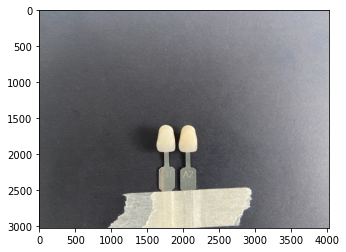

In [53]:
imgA1A2_01  = cv2.imread(doubleA1A2_1)
RGB_imgA1A2_01 = cv2.cvtColor(imgA1A2_01, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_imgA1A2_01)

#4. RGB to LAB

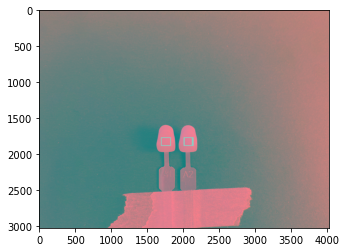

In [52]:
LAB_imgA1A2_01 = cv2.cvtColor(RGB_imgA1A2_01, cv2.COLOR_RGB2LAB)
plt.imshow(LAB_imgA1A2_01)

#5. ดึงสี

In [ ]:
A1_1= list()
A2_1 = list()
for i in range(LAB_imgA1A2_01.shape[0]): #ให้ i รันตาม row หรือ shape[0] คือแถว มีทั้งหมด 4032 แถว ของภาพที่ปรับขนาดมาแล้ว
     for j in range(LAB_imgA1A2_01.shape[1]): #ให้ j รันตาม colum มีทั้งหมด 3024 colum เช่น แถวที่ 1 เข้ามาให้รันครบ 3024colum
                if 1770<i<1880 and 1700<j<1830 :
                    A1_1.append(LAB_imgA1A2_01[i][j])
                if 1770<i<1880 and 2015<j<2145 :
                    A2_1.append(LAB_imgA1A2_01[i][j])  
A1_1,A2_1       

#6. หาค่า Mean

In [60]:
import numpy as np

In [63]:
meanA1_1 = list()
meanA2_1 = list()
for i in range(LAB_imgA1A2_01.shape[0]): #ให้ i รันตาม row หรือ shape[0] คือแถว มีทั้งหมด 4032 แถว ของภาพที่ปรับขนาดมาแล้ว
     for j in range(LAB_imgA1A2_01.shape[1]): #ให้ j รันตาม colum มีทั้งหมด 3024 colum เช่น แถวที่ 1 เข้ามาให้รันครบ 3024colum
                if 1769<i<1881 and 2019<j<2131 :
                  meanA1_1.append(LAB_imgA1A2_01[i][j])
                if 1770<i<1880 and 2015<j<2145 :
                  meanA2_1.append(LAB_imgA1A2_01[i][j])  
meanA1_1 = np.array(meanA1_1)
meanA2_1 = np.array(meanA2_1)

labA1_1 = list()
labA2_1 = list()
for i in range(3):
    labA1_1.append(meanA1_1[:,i].mean())
    labA2_1.append(meanA2_1[:,i].mean())
labA1_1,labA2_1 

([207.6281957633309, 143.69353136920705, 160.3385277169061],
 [198.7644548751867, 151.6512339093948, 164.62776473934997])

#7.คำนวณระยะห่างระหว่างจุดแบบ Euclidean distance

In [64]:
from scipy.spatial import distance

In [65]:
UA1A2_1 = distance.euclidean(labA1_1,labA2_1)

In [66]:
UA1A2_1

12.660508934674507

#วาดกรอบ

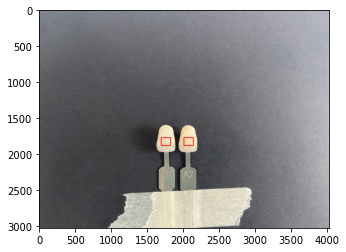

In [54]:
denA1= cv2.rectangle(RGB_imgA1A2_01,(1700,1880),(1830,1770),(255,0,0),10)
denA2= cv2.rectangle(RGB_imgA1A2_01,(2015,1880),(2145,1770),(255,0,0),10) #วาดสี่เหลี่ยม
plt.imshow(RGB_imgA1A2_01)#โชว์